In [1]:
# Import BeautifulSoup and Requests libraries for web scraping

from bs4 import BeautifulSoup
import requests

In [2]:
page = requests.get('https://en.wikipedia.org/wiki/List_of_largest_companies_in_the_United_States_by_revenue')

In [3]:
soup = BeautifulSoup(page.text, 'html')

In [ ]:
print(soup)

In [ ]:
# Locate table containing needed data

soup.find_all('table')[1]

In [ ]:
# Isolate the table containing the needed data

table = soup.find_all('table')[1]

print(table)

In [7]:
# Locate the column names

table.find_all('th')

[<th>Rank
 </th>,
 <th>Name
 </th>,
 <th>Industry
 </th>,
 <th>Revenue <br/>(USD millions)
 </th>,
 <th>Revenue growth
 </th>,
 <th>Employees
 </th>,
 <th>Headquarters
 </th>]

In [8]:
world_table = table.find_all('th')

In [9]:
# Insert the column titles into a list

world_table_titles = [title.text.strip() for title in world_table]

print(world_table_titles)

['Rank', 'Name', 'Industry', 'Revenue (USD millions)', 'Revenue growth', 'Employees', 'Headquarters']


In [10]:
# Import pandas to assign column names to a DataFrame

import pandas as pd

In [11]:
# Assign the column titles in the list as column titles in the DataFrame

df = pd.DataFrame(columns = world_table_titles)

df

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters


In [ ]:
# Locating the values for the columns

table.find_all('tr')

In [ ]:
# Locating the values for the columns

column_data = table.find_all('tr')

column_data

In [14]:
# Using a loop to transfer data to new rows in the DataFrame

for row in column_data[1:]: # Exclude the column names inside <td></td> by specifying position
    row_data = row.find_all('td')
    individual_row_data = [data.text.strip() for data in row_data]
    if row.find_all('span', title = 'Decrease'): # The table contains images to indicate whether revenue growth is negative or positive
        individual_row_data[4] = '-' + individual_row_data[4] # If the revenue growth is negative, add a minus sign  

    length = len(df)
    df.loc[length] = individual_row_data

In [15]:
# Checking whether the data was transferred to the DataFrame successfully

df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,"611,289",6.7%,"2,100,000","Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,"513,983",9.4%,"1,540,000","Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,"413,680",44.8%,"62,000","Spring, Texas"
3,4,Apple,Electronics industry,"394,328",7.8%,"164,000","Cupertino, California"
4,5,UnitedHealth Group,Healthcare,"324,162",12.7%,"400,000","Minnetonka, Minnesota"


In [16]:
# Checking whether the loop to add a minus sign for negative revenue growth worked correctly

# Revenue growth is -10.7%, loop worked successfully

df.iloc[26]

Rank                                            27
Name                      Walgreens Boots Alliance
Industry                   Pharmaceutical industry
Revenue (USD millions)                     132,703
Revenue growth                              -10.7%
Employees                                  262,500
Headquarters                   Deerfield, Illinois
Name: 26, dtype: object

# Exploratory Data Cleaning

In [17]:
# Remove special characters from columns with numeric values

df['Revenue (USD millions)'] = df['Revenue (USD millions)'].str.replace(',', '')
df['Revenue growth'] = df['Revenue growth'].str.replace('%', '')
df['Employees'] = df['Employees'].str.replace(',', '')
df['Employees'] = df['Employees'].str.replace('[2]', '')

df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,6.7,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,9.4,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,44.8,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,7.8,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,12.7,400000,"Minnetonka, Minnesota"


In [18]:
# Checking column data types

print(df.dtypes)

Rank                      object
Name                      object
Industry                  object
Revenue (USD millions)    object
Revenue growth            object
Employees                 object
Headquarters              object
dtype: object


In [19]:
# Change data types

df = df.astype({'Rank': int, 
                'Name': str, 
                'Industry': str, 
                'Revenue (USD millions)': int, 
                'Revenue growth': float, 
                'Employees': int, 
                'Headquarters': str})

print(df.dtypes)

Rank                        int32
Name                       object
Industry                   object
Revenue (USD millions)      int32
Revenue growth            float64
Employees                   int32
Headquarters               object
dtype: object


In [20]:
# Convert 'Revenue growth' column from percentage to decimal

df['Revenue growth'] = df['Revenue growth'] / 100

df.head()

,Rank,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,1,Walmart,Retail,611289,0.067,2100000,"Bentonville, Arkansas"
1,2,Amazon,Retail and cloud computing,513983,0.094,1540000,"Seattle, Washington"
2,3,ExxonMobil,Petroleum industry,413680,0.448,62000,"Spring, Texas"
3,4,Apple,Electronics industry,394328,0.078,164000,"Cupertino, California"
4,5,UnitedHealth Group,Healthcare,324162,0.127,400000,"Minnetonka, Minnesota"


In [21]:
# Drop the 'Rank' column, unnecessary for analysis

df.drop('Rank', axis=1, inplace=True)

df.head()

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,Walmart,Retail,611289,0.067,2100000,"Bentonville, Arkansas"
1,Amazon,Retail and cloud computing,513983,0.094,1540000,"Seattle, Washington"
2,ExxonMobil,Petroleum industry,413680,0.448,62000,"Spring, Texas"
3,Apple,Electronics industry,394328,0.078,164000,"Cupertino, California"
4,UnitedHealth Group,Healthcare,324162,0.127,400000,"Minnetonka, Minnesota"


In [22]:
# Extract the states only from the 'Headquarters' column

df['Headquarters'] = df['Headquarters'].str.split(',').str.get(-1)

df.head()

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters
0,Walmart,Retail,611289,0.067,2100000,Arkansas
1,Amazon,Retail and cloud computing,513983,0.094,1540000,Washington
2,ExxonMobil,Petroleum industry,413680,0.448,62000,Texas
3,Apple,Electronics industry,394328,0.078,164000,California
4,UnitedHealth Group,Healthcare,324162,0.127,400000,Minnesota


In [23]:
# Add new column 'Revenue per employee'

df['Revenue per employee'] = round(df['Revenue (USD millions)'] / df['Employees'], 2)

df.head()

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue per employee
0,Walmart,Retail,611289,0.067,2100000,Arkansas,0.29
1,Amazon,Retail and cloud computing,513983,0.094,1540000,Washington,0.33
2,ExxonMobil,Petroleum industry,413680,0.448,62000,Texas,6.67
3,Apple,Electronics industry,394328,0.078,164000,California,2.40
4,UnitedHealth Group,Healthcare,324162,0.127,400000,Minnesota,0.81


# Exploratory Data Analysis

In [24]:
# Getting the company with the most employees

df_sorted = df.sort_values(by = 'Employees', ascending = False, ignore_index = True)

df_sorted.head(1)

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue per employee
0,Walmart,Retail,611289,0.067,2100000,Arkansas,0.29


In [25]:
# Getting the company with the least employees

df_sorted = df.sort_values(by = 'Employees', ascending = True, ignore_index = True)

df_sorted.head(1)

,Name,Industry,Revenue (USD millions),Revenue growth,Employees,Headquarters,Revenue per employee
0,PBF Energy,Petroleum industry,46830,0.718,3616,New Jersey,12.95


In [26]:
# Getting the average revenue

df['Revenue (USD millions)'].median(axis = 0)

80824.5

In [27]:
# Calculating the average revenue per industy

avg_revenue = round(df.groupby(['Industry'])['Revenue (USD millions)'].mean(), 2)

print(avg_revenue)

Industry
Aerospace and defense                  66296.00
Agriculture cooperative                47194.00
Agriculture manufacturing              52577.00
Airline                                48169.33
Apparel                                46710.00
Automotive and energy                  81462.00
Automotive industry                   157396.00
Beverage                               86859.00
Chemical industry                      56902.00
Conglomerate                          148572.67
Conglomerate and telecomunications    120741.00
Consumer products manufacturing        80187.00
Electronics industry                  394328.00
Financial                              53537.50
Financial services                    154792.00
Financials                             84296.55
Food industry                          84394.00
Food processing                        50238.00
Food service                           68636.00
Health                                276711.00
Health insurance               

In [28]:
# Checking for correlations

df.corr(numeric_only = True)

,Revenue (USD millions),Revenue growth,Employees,Revenue per employee
Revenue (USD millions),1.000000,-0.054699,0.641994,0.044186
Revenue growth,-0.054699,1.000000,-0.205546,0.510497
Employees,0.641994,-0.205546,1.000000,-0.291540
Revenue per employee,0.044186,0.510497,-0.291540,1.000000


In [29]:
df.corr(method = 'kendall', numeric_only = True)

,Revenue (USD millions),Revenue growth,Employees,Revenue per employee
Revenue (USD millions),1.000000,-0.004245,0.236459,0.084211
Revenue growth,-0.004245,1.000000,-0.262259,0.283342
Employees,0.236459,-0.262259,1.000000,-0.681110
Revenue per employee,0.084211,0.283342,-0.681110,1.000000


In [30]:
df.corr(method = 'pearson', numeric_only = True)

,Revenue (USD millions),Revenue growth,Employees,Revenue per employee
Revenue (USD millions),1.000000,-0.054699,0.641994,0.044186
Revenue growth,-0.054699,1.000000,-0.205546,0.510497
Employees,0.641994,-0.205546,1.000000,-0.291540
Revenue per employee,0.044186,0.510497,-0.291540,1.000000


In [31]:
df.corr(method = 'spearman', numeric_only = True)

,Revenue (USD millions),Revenue growth,Employees,Revenue per employee
Revenue (USD millions),1.000000,0.000642,0.336566,0.131765
Revenue growth,0.000642,1.000000,-0.383911,0.406741
Employees,0.336566,-0.383911,1.000000,-0.857523
Revenue per employee,0.131765,0.406741,-0.857523,1.000000


In [32]:
# Overall, no strong correlations between variables

In [33]:
# Importing matplotlib for visualization

import matplotlib.pyplot as plt

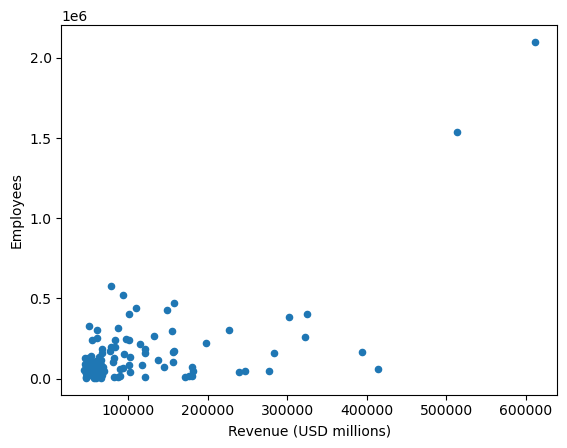

In [38]:
df.plot(kind = 'scatter', x = 'Revenue (USD millions)', y = 'Employees')

plt.show()

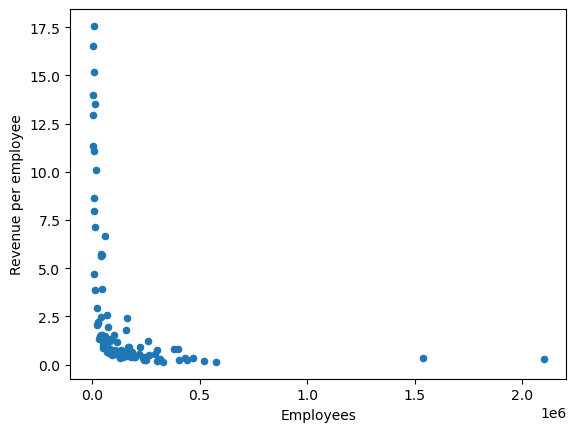

In [39]:
df.plot(kind = 'scatter', x = 'Employees', y = 'Revenue per employee')

plt.show()

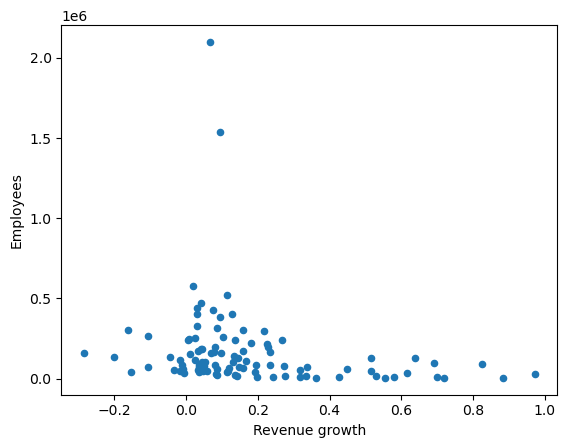

In [36]:
df.plot(kind = 'scatter', x = 'Revenue growth', y = 'Employees')

plt.show()

In [37]:
# Import DataFrame to .CSV

df.to_csv(r'C:\Users\Nicolas\Documents\Work\SQL\Data Cleaning\Companies.csv', index = False)